## What is correlation?

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

<b>Pearson Correlation Coefficient</b>

<img src='https://miro.medium.com/max/640/1*YGSS2iU9jPxLcyaTTdyr4A.jpeg'>

<img src='https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png'>

## correlation does not imply causation

<img src='https://www.statology.org/wp-content/uploads/2021/08/corrCause1-768x557.png' width="400" height="400">

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv('csv/r_dataisbeautiful_posts.csv')

C:\Users\rahul\AppData\Local\Temp\ipykernel_26352\2912702214.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csv/r_dataisbeautiful_posts.csv')


In [13]:
df.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,ll1p9h,Wordcloud of trending video titles on YouTube ...,1,OmarZiada,OC: 1,NaN,0.0,[],1613473961,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,ll1o4h,Wordcloud of trending videos on YouTube in the...,1,OmarZiada,OC: 1,moderator,0.0,[],1613473829,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,ll15gx,Immunization in India. Source: https://niti.go...,1,Professional_Napper_,NaN,moderator,0.0,[],1613471541,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,ll0iup,How to quickly estimate the impact of players ...,1,Viziball,NaN,automod_filtered,0.0,[],1613468624,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,ll0g9a,How to quickly estimate the impact of players ...,1,Viziball,NaN,moderator,0.0,[],1613468281,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [14]:
df.corr()

,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.330506,0.005262,0.574893,0.015676
total_awards_received,0.330506,1.000000,0.027446,0.168387,0.001456
created_utc,0.005262,0.027446,1.000000,0.029795,0.014476
num_comments,0.574893,0.168387,0.029795,1.000000,0.022924
over_18,0.015676,0.001456,0.014476,0.022924,1.000000


<AxesSubplot:>

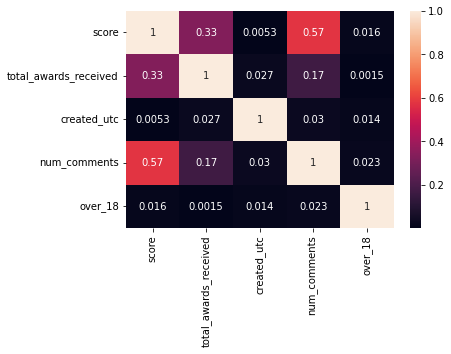

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


# Box plot


<img src='https://www150.statcan.gc.ca/n1/edu/power-pouvoir/fig/fig04-5-2-1-eng.png' height='500' width='500'>

# A box plot gives a five-number summary of a set of data which is-

- Minimum – It is the minimum value in the dataset excluding the outliers
- First Quartile (Q1) – 25% of the data lies below the First (lower) Quartile.
- Median (Q2) – It is the mid-point of the dataset. Half of the values lie below it and half above.
- Third Quartile (Q3) – 75% of the data lies below the Third (Upper) Quartile.
- Maximum – It is the maximum value in the dataset excluding the outliers.

<AxesSubplot:>

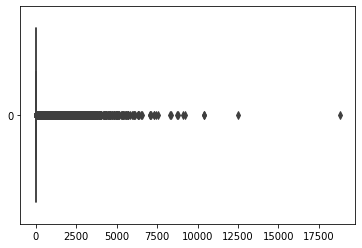

In [19]:
sns.boxplot(df.num_comments,orient='h')

The area inside the box (50% of the data) is known as the Inter Quartile Range.<br> The IQR is calculated as –
IQR = Q3-Q1



Outliers are the data points below and above the lower and upper limit. The lower and upper limit is calculated as – 
- Lower Limit = Q1 - 1.5*IQR
- Upper Limit = Q3 + 1.5*IQR

<img src='https://www.simplypsychology.org/box-plots-distribution.jpg' height="500" widht="500">

In [40]:
bikeshare = df.copy()
print(bikeshare.shape)
# print(bikeshare[["bike_number","end_time"]].sort_values("end_time", ascending = False).to_csv(header = False, index = False, sep = "|"))

bikeshare = bikeshare.groupby("bike_number").apply(lambda x : x).reset_index()
print(bikeshare.shape)

(100, 11)
(100, 12)


In [38]:
bikeshare_lambda

,index,duration,duration_seconds,start_time,start_station,start_terminal,end_time,end_station,end_terminal,bike_number,rider_type,id
0,0,0h 10m 47sec.,647,2012-03-25 10:30:00,17th & Corcoran St NW,31214,2012-03-25 10:40:00,Calvert St & Woodley Pl NW,31106,W00576,Registered,326188
1,1,0h 11m 45sec.,705,2012-03-28 18:59:00,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,2012-03-28 19:11:00,21st & M St NW,31212,W00011,Registered,345585
2,2,0h 7m 45sec.,465,2012-03-12 22:30:00,3rd & H St NE,31616,2012-03-12 22:37:00,Florida Ave & R St NW,31503,W01215,Registered,251919
3,3,0h 4m 27sec.,267,2012-03-12 20:11:00,14th & G St NW,31238,2012-03-12 20:15:00,14th & Rhode Island Ave NW,31203,W00455,Registered,251426
4,4,0h 10m 2sec.,602,2012-02-03 09:06:00,Lamont & Mt Pleasant NW,31107,2012-02-03 09:16:00,17th & Rhode Island Ave NW,31239,W00300,Registered,105965
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0h 20m 32sec.,1232,2012-03-29 20:40:00,Jefferson Dr & 14th St SW,31247,2012-03-29 21:01:00,13th & D St NE,31622,W01468,Registered,352486
96,96,0h 15m 48sec.,948,2012-01-18 12:03:00,Florida Ave & R St NW,31503,2012-01-18 12:18:00,20th St & Florida Ave NW,31110,W00892,Registered,50983
97,97,0h 36m 50sec.,2210,2012-03-27 18:57:00,New York Ave & 15th St NW,31222,2012-03-27 19:34:00,New York Ave & 15th St NW,31222,W00522,Casual,340092
98,98,0h 39m 29sec.,2369,2012-03-16 10:22:00,Georgetown Harbor / 30th St NW,31215,2012-03-16 11:02:00,10th St & Constitution Ave NW,31219,W00332,Casual,271836


In [22]:
df = pd.DataFrame({'duration': {0: '0h 10m 47sec.', 1: '0h 11m 45sec.', 2: '0h 7m 45sec.', 3: '0h 4m 27sec.', 4: '0h 10m 2sec.', 5: '0h 24m 59sec.', 6: '0h 13m 45sec.', 7: '0h 12m 58sec.', 8: '0h 2m 2sec.', 9: '0h 17m 44sec.', 10: '0h 19m 43sec.', 11: '0h 16m 33sec.', 12: '0h 6m 49sec.', 13: '0h 5m 34sec.', 14: '0h 14m 17sec.', 15: '0h 16m 11sec.', 16: '0h 13m 42sec.', 17: '0h 30m 29sec.', 18: '0h 9m 11sec.', 19: '0h 11m 30sec.', 20: '0h 6m 13sec.', 21: '0h 2m 50sec.', 22: '0h 10m 9sec.', 23: '0h 22m 26sec.', 24: '0h 9m 18sec.', 25: '0h 28m 39sec.', 26: '0h 0m 49sec.', 27: '0h 14m 12sec.', 28: '0h 15m 36sec.', 29: '0h 11m 15sec.', 30: '0h 2m 13sec.', 31: '0h 15m 5sec.', 32: '0h 13m 21sec.', 33: '0h 28m 22sec.', 34: '0h 5m 33sec.', 35: '0h 15m 2sec.', 36: '0h 18m 44sec.', 37: '0h 13m 25sec.', 38: '0h 7m 51sec.', 39: '0h 10m 37sec.', 40: '0h 8m 34sec.', 41: '0h 12m 21sec.', 42: '0h 22m 41sec.', 43: '0h 15m 43sec.', 44: '0h 14m 50sec.', 45: '0h 6m 51sec.', 46: '0h 12m 22sec.', 47: '0h 21m 54sec.', 48: '0h 12m 23sec.', 49: '0h 12m 30sec.', 50: '0h 10m 47sec.', 51: '0h 0m 3sec.', 52: '0h 6m 37sec.', 53: '0h 15m 4sec.', 54: '0h 6m 46sec.', 55: '0h 12m 4sec.', 56: '0h 7m 44sec.', 57: '0h 13m 44sec.', 58: '0h 9m 42sec.', 59: '0h 24m 20sec.', 60: '0h 11m 55sec.', 61: '0h 2m 48sec.', 62: '0h 4m 10sec.', 63: '0h 6m 41sec.', 64: '0h 16m 10sec.', 65: '0h 21m 21sec.', 66: '0h 6m 8sec.', 67: '0h 10m 3sec.', 68: '0h 1m 27sec.', 69: '0h 20m 13sec.', 70: '0h 11m 53sec.', 71: '0h 7m 58sec.', 72: '0h 18m 32sec.', 73: '0h 7m 55sec.', 74: '0h 6m 52sec.', 75: '0h 14m 27sec.', 76: '0h 20m 31sec.', 77: '0h 6m 18sec.', 78: '0h 8m 32sec.', 79: '0h 23m 59sec.', 80: '0h 7m 30sec.', 81: '0h 7m 51sec.', 82: '0h 15m 16sec.', 83: '0h 10m 3sec.', 84: '0h 8m 12sec.', 85: '1h 5m 30sec.', 86: '0h 11m 58sec.', 87: '0h 6m 16sec.', 88: '0h 18m 42sec.', 89: '0h 3m 59sec.', 90: '0h 10m 52sec.', 91: '1h 7m 39sec.', 92: '0h 10m 11sec.', 93: '0h 39m 14sec.', 94: '0h 4m 19sec.', 95: '0h 20m 32sec.', 96: '0h 15m 48sec.', 97: '0h 36m 50sec.', 98: '0h 39m 29sec.', 99: '0h 24m 50sec.'}, 'duration_seconds': {0: 647, 1: 705, 2: 465, 3: 267, 4: 602, 5: 1499, 6: 825, 7: 778, 8: 122, 9: 1064, 10: 1183, 11: 993, 12: 409, 13: 334, 14: 857, 15: 971, 16: 822, 17: 1829, 18: 551, 19: 690, 20: 373, 21: 170, 22: 609, 23: 1346, 24: 558, 25: 1719, 26: 49, 27: 852, 28: 936, 29: 675, 30: 133, 31: 905, 32: 801, 33: 1702, 34: 333, 35: 902, 36: 1124, 37: 805, 38: 471, 39: 637, 40: 514, 41: 741, 42: 1361, 43: 943, 44: 890, 45: 411, 46: 742, 47: 1314, 48: 743, 49: 750, 50: 647, 51: 3, 52: 397, 53: 904, 54: 406, 55: 724, 56: 464, 57: 824, 58: 582, 59: 1460, 60: 715, 61: 168, 62: 250, 63: 401, 64: 970, 65: 1281, 66: 368, 67: 603, 68: 87, 69: 1213, 70: 713, 71: 478, 72: 1112, 73: 475, 74: 412, 75: 867, 76: 1231, 77: 378, 78: 512, 79: 1439, 80: 450, 81: 471, 82: 916, 83: 603, 84: 492, 85: 3930, 86: 718, 87: 376, 88: 1122, 89: 239, 90: 652, 91: 4059, 92: 611, 93: 2354, 94: 259, 95: 1232, 96: 948, 97: 2210, 98: 2369, 99: 1490}, 'start_time': {0: '2012-03-25 10:30:00', 1: '2012-03-28 18:59:00', 2: '2012-03-12 22:30:00', 3: '2012-03-12 20:11:00', 4: '2012-02-03 09:06:00', 5: '2012-03-30 19:35:00', 6: '2012-03-10 16:44:00', 7: '2012-02-09 21:32:00', 8: '2012-03-29 17:36:00', 9: '2012-02-18 08:43:00', 10: '2012-03-31 19:08:00', 11: '2012-02-22 08:20:00', 12: '2012-03-22 17:10:00', 13: '2012-01-19 20:39:00', 14: '2012-03-31 10:30:00', 15: '2012-03-14 17:24:00', 16: '2012-03-31 09:10:00', 17: '2012-03-23 17:42:00', 18: '2012-03-29 15:10:00', 19: '2012-01-05 08:23:00', 20: '2012-03-16 08:27:00', 21: '2012-03-25 14:04:00', 22: '2012-03-17 13:30:00', 23: '2012-03-14 21:02:00', 24: '2012-02-01 07:55:00', 25: '2012-02-10 12:40:00', 26: '2012-03-14 20:23:00', 27: '2012-03-15 18:52:00', 28: '2012-03-22 18:14:00', 29: '2012-02-26 16:27:00', 30: '2012-01-08 11:51:00', 31: '2012-03-13 07:25:00', 32: '2012-02-13 18:46:00', 33: '2012-03-20 19:53:00', 34: '2012-03-01 18:08:00', 35: '2012-03-18 18:18:00', 36: '2012-01-01 01:04:00', 37: '2012-01-07 20:50:00', 38: '2012-03-13 07:07:00', 39: '2012-03-23 07:38:00', 40: '2012-03-14 07:18:00', 41: '2012-03-28 12:42:00', 42: '2012-03-22 21:00:00', 43: '2012-02-18 15:15:00', 44: '2012-02-10 21:31:00', 45: '2012-03-12 06:39:00', 46: '2012-03-14 23:01:00', 47: '2012-03-22 16:43:00', 48: '2012-01-17 11:38:00', 49: '2012-03-03 14:30:00', 50: '2012-02-18 12:18:00', 51: '2012-03-06 09:42:00', 52: '2012-01-15 20:42:00', 53: '2012-02-14 19:05:00', 54: '2012-03-31 08:58:00', 55: '2012-03-31 11:58:00', 56: '2012-02-13 15:17:00', 57: '2012-03-26 16:45:00', 58: '2012-03-24 10:56:00', 59: '2012-01-13 08:48:00', 60: '2012-03-02 08:45:00', 61: '2012-01-28 16:11:00', 62: '2012-01-22 20:20:00', 63: '2012-02-22 22:49:00', 64: '2012-03-12 18:17:00', 65: '2012-01-24 10:46:00', 66: '2012-01-18 22:17:00', 67: '2012-03-21 17:53:00', 68: '2012-02-03 19:34:00', 69: '2012-02-20 16:53:00', 70: '2012-03-15 13:09:00', 71: '2012-03-05 07:18:00', 72: '2012-01-13 17:46:00', 73: '2012-01-10 14:09:00', 74: '2012-02-03 19:10:00', 75: '2012-02-09 17:48:00', 76: '2012-01-24 23:22:00', 77: '2012-03-01 18:03:00', 78: '2012-01-14 16:19:00', 79: '2012-02-08 07:10:00', 80: '2012-02-20 08:46:00', 81: '2012-03-11 10:14:00', 82: '2012-03-21 08:32:00', 83: '2012-02-17 19:09:00', 84: '2012-03-23 12:16:00', 85: '2012-03-23 14:21:00', 86: '2012-02-23 00:14:00', 87: '2012-03-25 16:57:00', 88: '2012-03-21 17:32:00', 89: '2012-02-14 14:11:00', 90: '2012-03-12 08:51:00', 91: '2012-03-21 18:37:00', 92: '2012-03-06 12:44:00', 93: '2012-03-23 19:01:00', 94: '2012-03-28 09:23:00', 95: '2012-03-29 20:40:00', 96: '2012-01-18 12:03:00', 97: '2012-03-27 18:57:00', 98: '2012-03-16 10:22:00', 99: '2012-03-31 15:13:00'}, 'start_station': {0: '17th & Corcoran St NW', 1: 'Rosslyn Metro / Wilson Blvd & Ft Myer Dr', 2: '3rd & H St NE', 3: '14th & G St NW', 4: 'Lamont & Mt Pleasant NW', 5: 'Eastern Market Metro / Pennsylvania Ave & 7th ...', 6: 'North Capitol St & F St NW', 7: '14th & R St NW', 8: '18th & Bell St', 9: '21st & I St NW', 10: '19th & E Street NW', 11: '7th & R St NW / Shaw Library', 12: 'Eastern Market Metro / Pennsylvania Ave & 7th ...', 13: 'Columbus Circle / Union Station', 14: '13th & D St NE', 15: '13th St & New York Ave NW', 16: '36th & Calvert St NW / Glover Park', 17: '11th & Kenyon St NW', 18: '4th & M St SW', 19: '14th & Rhode Island Ave NW', 20: '1st & M St NE', 21: '15th & P St NW', 22: 'Georgia & New Hampshire Ave NW', 23: 'Massachusetts Ave & Dupont Circle NW', 24: '16th & Harvard St NW', 25: 'Columbus Circle / Union Station', 26: 'Columbia Rd & Belmont St NW', 27: 'Adams Mill & Columbia Rd NW', 28: 'Tenleytown / Wisconsin Ave & Albemarle St NW', 29: 'Georgia Ave and Fairmont St NW', 30: 'Columbia Rd & Belmont St NW', 31: '14th St & Spring Rd NW', 32: 'John McCormack Dr & Michigan Ave NE', 33: 'Jefferson Dr & 14th St SW', 34: '13th St & New York Ave NW', 35: '5th St & K St NW', 36: '4th St & Massachusetts Ave NW', 37: '16th & Harvard St NW', 38: 'US Dept of State / Virginia Ave & 21st St NW', 39: 'Lamont & Mt Pleasant NW', 40: '15th & P St NW', 41: '14th & V St NW', 42: '19th & E Street NW', 43: '10th & U St NW', 44: '8th & H St NW', 45: '14th & Harvard St NW', 46: 'California St & Florida Ave NW', 47: 'Lamont & Mt Pleasant NW', 48: '17th & K St NW / Farragut Square', 49: '21st & I St NW', 50: 'Georgia Ave and Fairmont St NW', 51: 'Massachusetts Ave & Dupont Circle NW', 52: '21st & M St NW', 53: '21st & I St NW', 54: 'Columbia Rd & Belmont St NW', 55: '14th & Harvard St NW', 56: 'Massachusetts Ave & Dupont Circle NW', 57: 'Georgetown Harbor / 30th St NW', 58: '25th St & Pennsylvania Ave NW', 59: 'Van Ness Metro / UDC', 60: 'Massachusetts Ave & Dupont Circle NW', 61: '16th & Harvard St NW', 62: '14th & Harvard St NW', 63: 'Thomas Circle', 64: "L'Enfant Plaza / 7th & C St SW", 65: '13th & H St NE', 66: '5th St & K St NW', 67: 'Lynn & 19th St North', 68: '11th & Kenyon St NW', 69: "L'Enfant Plaza / 7th & C St SW", 70: '16th & U St NW', 71: '11th & Kenyon St NW', 72: '14th & D St NW / Ronald Reagan Building', 73: 'Columbus Circle / Union Station', 74: 'North Capitol St & F St NW', 75: '4th & D St NW / Judiciary Square', 76: '5th St & K St NW', 77: '7th & R St NW / Shaw Library', 78: 'Calvert St & Woodley Pl NW', 79: '5th & F St NW', 80: '7th & R St NW / Shaw Library', 81: '3000 Connecticut Ave NW / National Zoo', 82: '7th & R St NW / Shaw Library', 83: '18th & M St NW', 84: 'Georgia Ave and Fairmont St NW', 85: 'USDA / 12th & Independence Ave SW', 86: 'Georgia & New Hampshire Ave NW', 87: 'Convention Center / 7th & M St NW', 88: '13th St & New York Ave NW', 89: '14th & D St SE', 90: '10th & U St NW', 91: 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials', 92: '14th & V St NW', 93: '19th St & Constitution Ave NW', 94: 'M St & Pennsylvania Ave NW', 95: 'Jefferson Dr & 14th St SW', 96: 'Florida Ave & R St NW', 97: 'New York Ave & 15th St NW', 98: 'Georgetown Harbor / 30th St NW', 99: 'Calvert St & Woodley Pl NW'}, 'start_terminal': {0: 31214, 1: 31015, 2: 31616, 3: 31238, 4: 31107, 5: 31613, 6: 31624, 7: 31202, 8: 31007, 9: 31205, 10: 31206, 11: 31245, 12: 31613, 13: 31623, 14: 31622, 15: 31227, 16: 31304, 17: 31102, 18: 31108, 19: 31203, 20: 31603, 21: 31201, 22: 31400, 23: 31200, 24: 31103, 25: 31623, 26: 31113, 27: 31104, 28: 31303, 29: 31207, 30: 31113, 31: 31401, 32: 31502, 33: 31247, 34: 31227, 35: 31600, 36: 31604, 37: 31103, 38: 31220, 39: 31107, 40: 31201, 41: 31101, 42: 31206, 43: 31111, 44: 31228, 45: 31105, 46: 31116, 47: 31107, 48: 31233, 49: 31205, 50: 31207, 51: 31200, 52: 31212, 53: 31205, 54: 31113, 55: 31105, 56: 31200, 57: 31215, 58: 31237, 59: 31300, 60: 31200, 61: 31103, 62: 31105, 63: 31241, 64: 31218, 65: 31611, 66: 31600, 67: 31014, 68: 31102, 69: 31218, 70: 31229, 71: 31102, 72: 31231, 73: 31623, 74: 31624, 75: 31621, 76: 31600, 77: 31245, 78: 31106, 79: 31620, 80: 31245, 81: 31307, 82: 31245, 83: 31221, 84: 31207, 85: 31217, 86: 31400, 87: 31223, 88: 31227, 89: 31607, 90: 31111, 91: 31240, 92: 31101, 93: 31235, 94: 31246, 95: 31247, 96: 31503, 97: 31222, 98: 31215, 99: 31106}, 'end_time': {0: '2012-03-25 10:40:00', 1: '2012-03-28 19:11:00', 2: '2012-03-12 22:37:00', 3: '2012-03-12 20:15:00', 4: '2012-02-03 09:16:00', 5: '2012-03-30 20:00:00', 6: '2012-03-10 16:58:00', 7: '2012-02-09 21:45:00', 8: '2012-03-29 17:38:00', 9: '2012-02-18 09:01:00', 10: '2012-03-31 19:28:00', 11: '2012-02-22 08:37:00', 12: '2012-03-22 17:17:00', 13: '2012-01-19 20:45:00', 14: '2012-03-31 10:44:00', 15: '2012-03-14 17:40:00', 16: '2012-03-31 09:24:00', 17: '2012-03-23 18:13:00', 18: '2012-03-29 15:20:00', 19: '2012-01-05 08:34:00', 20: '2012-03-16 08:33:00', 21: '2012-03-25 14:06:00', 22: '2012-03-17 13:40:00', 23: '2012-03-14 21:24:00', 24: '2012-02-01 08:04:00', 25: '2012-02-10 13:09:00', 26: '2012-03-14 20:24:00', 27: '2012-03-15 19:07:00', 28: '2012-03-22 18:30:00', 29: '2012-02-26 16:38:00', 30: '2012-01-08 11:54:00', 31: '2012-03-13 07:40:00', 32: '2012-02-13 19:00:00', 33: '2012-03-20 20:22:00', 34: '2012-03-01 18:14:00', 35: '2012-03-18 18:33:00', 36: '2012-01-01 01:23:00', 37: '2012-01-07 21:04:00', 38: '2012-03-13 07:15:00', 39: '2012-03-23 07:49:00', 40: '2012-03-14 07:27:00', 41: '2012-03-28 12:54:00', 42: '2012-03-22 21:23:00', 43: '2012-02-18 15:31:00', 44: '2012-02-10 21:46:00', 45: '2012-03-12 06:46:00', 46: '2012-03-14 23:13:00', 47: '2012-03-22 17:05:00', 48: '2012-01-17 11:51:00', 49: '2012-03-03 14:42:00', 50: '2012-02-18 12:29:00', 51: '2012-03-06 09:42:00', 52: '2012-01-15 20:48:00', 53: '2012-02-14 19:20:00', 54: '2012-03-31 09:05:00', 55: '2012-03-31 12:10:00', 56: '2012-02-13 15:24:00', 57: '2012-03-26 16:58:00', 58: '2012-03-24 11:06:00', 59: '2012-01-13 09:12:00', 60: '2012-03-02 08:57:00', 61: '2012-01-28 16:14:00', 62: '2012-01-22 20:24:00', 63: '2012-02-22 22:56:00', 64: '2012-03-12 18:34:00', 65: '2012-01-24 11:08:00', 66: '2012-01-18 22:23:00', 67: '2012-03-21 18:03:00', 68: '2012-02-03 19:36:00', 69: '2012-02-20 17:13:00', 70: '2012-03-15 13:21:00', 71: '2012-03-05 07:26:00', 72: '2012-01-13 18:05:00', 73: '2012-01-10 14:17:00', 74: '2012-02-03 19:17:00', 75: '2012-02-09 18:02:00', 76: '2012-01-24 23:42:00', 77: '2012-03-01 18:09:00', 78: '2012-01-14 16:27:00', 79: '2012-02-08 07:34:00', 80: '2012-02-20 08:54:00', 81: '2012-03-11 10:21:00', 82: '2012-03-21 08:47:00', 83: '2012-02-17 19:19:00', 84: '2012-03-23 12:24:00', 85: '2012-03-23 15:27:00', 86: '2012-02-23 00:26:00', 87: '2012-03-25 17:03:00', 88: '2012-03-21 17:51:00', 89: '2012-02-14 14:15:00', 90: '2012-03-12 09:02:00', 91: '2012-03-21 19:44:00', 92: '2012-03-06 12:55:00', 93: '2012-03-23 19:40:00', 94: '2012-03-28 09:27:00', 95: '2012-03-29 21:01:00', 96: '2012-01-18 12:18:00', 97: '2012-03-27 19:34:00', 98: '2012-03-16 11:02:00', 99: '2012-03-31 15:37:00'}, 'end_station': {0: 'Calvert St & Woodley Pl NW', 1: '21st & M St NW', 2: 'Florida Ave & R St NW', 3: '14th & Rhode Island Ave NW', 4: '17th & Rhode Island Ave NW', 5: 'Massachusetts Ave & Dupont Circle NW', 6: 'Thomas Circle', 7: '18th & M St NW', 8: '23rd & Crystal Dr', 9: '8th & H St NW', 10: '10th St & Constitution Ave NW', 11: 'New York Ave & 15th St NW', 12: '13th & D St NE', 13: '13th & H St NE', 14: '4th & E St SW', 15: '11th & H St NE', 16: '7th & T St NW', 17: 'Van Ness Metro / UDC', 18: 'USDA / 12th & Independence Ave SW', 19: 'North Capitol St & F St NW', 20: '5th St & K St NW', 21: '17th & Corcoran St NW', 22: '10th & U St NW', 23: 'Lincoln Park / 13th & East Capitol St NE', 24: 'Massachusetts Ave & Dupont Circle NW', 25: 'USDA / 12th & Independence Ave SW', 26: 'Columbia Rd & Belmont St NW', 27: 'Florida Ave & R St NW', 28: 'Connecticut Ave & Newark St NW / Cleveland Park', 29: '16th & Harvard St NW', 30: '20th St & Florida Ave NW', 31: 'McPherson Square - 14th & H St NW', 32: 'Columbus Circle / Union Station', 33: 'Clarendon Blvd & Pierce St', 34: '17th & K St NW / Farragut Square', 35: 'USDA / 12th & Independence Ave SW', 36: '15th St & Massachusetts Ave SE', 37: '14th & Rhode Island Ave NW', 38: 'Metro Center / 12th & G St NW', 39: '15th & P St NW', 40: '4th St & Massachusetts Ave NW', 41: '18th & M St NW', 42: 'S Joyce & Army Navy Dr', 43: '1st & Rhode Island Ave NW', 44: '14th & Rhode Island Ave NW', 45: 'Calvert St & Woodley Pl NW', 46: '1st & Rhode Island Ave NW', 47: 'Metro Center / 12th & G St NW', 48: '7th & F St NW / National Portrait Gallery', 49: '7th & F St NW / National Portrait Gallery', 50: 'Massachusetts Ave & Dupont Circle NW', 51: 'Massachusetts Ave & Dupont Circle NW', 52: '15th & P St NW', 53: '15th & P St NW', 54: '17th & Corcoran St NW', 55: 'McPherson Square - 14th & H St NW', 56: 'Adams Mill & Columbia Rd NW', 57: 'Adams Mill & Columbia Rd NW', 58: '17th & Corcoran St NW', 59: '10th St & Constitution Ave NW', 60: 'US Dept of State / Virginia Ave & 21st St NW', 61: 'Lamont & Mt Pleasant NW', 62: 'Adams Mill & Columbia Rd NW', 63: '20th & O St NW / Dupont South', 64: 'Eastern Market / 7th & North Carolina Ave SE', 65: '4th St & Massachusetts Ave NW', 66: '1st & M St NE', 67: '37th & O St NW / Georgetown University', 68: '11th & Kenyon St NW', 69: 'Thomas Circle', 70: 'New York Ave & 15th St NW', 71: '16th & U St NW', 72: '20th St & Florida Ave NW', 73: '14th & D St SE', 74: '7th & F St NW / National Portrait Gallery', 75: '1st & Rhode Island Ave NW', 76: 'Park Rd & Holmead Pl NW', 77: '17th & Rhode Island Ave NW', 78: 'Connecticut Ave & Newark St NW / Cleveland Park', 79: '18th & Bell St', 80: '8th & H St NW', 81: '20th St & Florida Ave NW', 82: 'C & O Canal & Wisconsin Ave NW', 83: '10th & U St NW', 84: '14th & V St NW', 85: 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials', 86: 'Florida Ave & R St NW', 87: '15th & P St NW', 88: 'Adams Mill & Columbia Rd NW', 89: 'Lincoln Park / 13th & East Capitol St NE', 90: '8th & H St NW', 91: '20th & O St NW / Dupont South', 92: '17th & K St NW [formerly 17th & L St NW]', 93: 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials', 94: '21st & M St NW', 95: '13th & D St NE', 96: '20th St & Florida Ave NW', 97: 'New York Ave & 15th St NW', 98: '10th St & Constitution Ave NW', 99: '7th & F St NW / National Portrait Gallery'}, 'end_terminal': {0: 31106, 1: 31212, 2: 31503, 3: 31203, 4: 31239, 5: 31200, 6: 31241, 7: 31221, 8: 31011, 9: 31228, 10: 31219, 11: 31222, 12: 31622, 13: 31611, 14: 31244, 15: 31614, 16: 31109, 17: 31300, 18: 31217, 19: 31624, 20: 31600, 21: 31214, 22: 31111, 23: 31619, 24: 31200, 25: 31217, 26: 31113, 27: 31503, 28: 31305, 29: 31103, 30: 31110, 31: 31216, 32: 31623, 33: 31016, 34: 31233, 35: 31217, 36: 31626, 37: 31203, 38: 31230, 39: 31201, 40: 31604, 41: 31221, 42: 31006, 43: 31506, 44: 31203, 45: 31106, 46: 31506, 47: 31230, 48: 31232, 49: 31232, 50: 31200, 51: 31200, 52: 31201, 53: 31201, 54: 31214, 55: 31216, 56: 31104, 57: 31104, 58: 31214, 59: 31219, 60: 31220, 61: 31107, 62: 31104, 63: 31234, 64: 31610, 65: 31604, 66: 31603, 67: 31236, 68: 31102, 69: 31241, 70: 31222, 71: 31229, 72: 31110, 73: 31607, 74: 31232, 75: 31506, 76: 31602, 77: 31239, 78: 31305, 79: 31007, 80: 31228, 81: 31110, 82: 31225, 83: 31111, 84: 31101, 85: 31240, 86: 31503, 87: 31201, 88: 31104, 89: 31619, 90: 31228, 91: 31234, 92: 31213, 93: 31240, 94: 31212, 95: 31622, 96: 31110, 97: 31222, 98: 31219, 99: 31232}, 'bike_number': {0: 'W00576', 1: 'W00011', 2: 'W01215', 3: 'W00455', 4: 'W00300', 5: 'W01352', 6: 'W00089', 7: 'W01158', 8: 'W00653', 9: 'W01398', 10: 'W01278', 11: 'W00356', 12: 'W00211', 13: 'W00724', 14: 'W01006', 15: 'W00034', 16: 'W01242', 17: 'W00688', 18: 'W01330', 19: 'W00380', 20: 'W00932', 21: 'W01241', 22: 'W00448', 23: 'W01296', 24: 'W00127', 25: 'W00679', 26: 'W00345', 27: 'W01331', 28: 'W01194', 29: 'W00455', 30: 'W00191', 31: 'W01271', 32: 'W00454', 33: 'W01023', 34: 'W00606', 35: 'W00361', 36: 'W01213', 37: 'W00566', 38: 'W00801', 39: 'W00573', 40: 'W01405', 41: 'W00501', 42: 'W01336', 43: 'W00471', 44: 'W00813', 45: 'W00506', 46: 'W01310', 47: 'W00746', 48: 'W01284', 49: 'W00495', 50: 'W00021', 51: 'W01309', 52: 'W00173', 53: 'W00585', 54: 'W01048', 55: 'W00270', 56: 'W01417', 57: 'w00644', 58: 'W01374', 59: 'W00983', 60: 'W00412', 61: 'W00075', 62: 'W00754', 63: 'W01153', 64: 'W00092', 65: 'W00418', 66: 'W01074', 67: 'W00926', 68: 'W00208', 69: 'W01409', 70: 'W00763', 71: 'W00595', 72: 'W00133', 73: 'W00888', 74: 'W01124', 75: 'W00519', 76: 'W00395', 77: 'W01153', 78: 'W00594', 79: 'W01307', 80: 'W01400', 81: 'W00677', 82: 'W01155', 83: 'W00449', 84: 'W00611', 85: 'W01226', 86: 'W01344', 87: 'W01408', 88: 'W00426', 89: 'W00793', 90: 'W01231', 91: 'W00497', 92: 'W00661', 93: 'W00560', 94: 'W00590', 95: 'W01468', 96: 'W00892', 97: 'W00522', 98: 'W00332', 99: 'W01097'}, 'rider_type': {0: 'Registered', 1: 'Registered', 2: 'Registered', 3: 'Registered', 4: 'Registered', 5: 'Registered', 6: 'Registered', 7: 'Registered', 8: 'Registered', 9: 'Registered', 10: 'Casual', 11: 'Registered', 12: 'Registered', 13: 'Registered', 14: 'Registered', 15: 'Registered', 16: 'Registered', 17: 'Registered', 18: 'Registered', 19: 'Registered', 20: 'Registered', 21: 'Registered', 22: 'Registered', 23: 'Registered', 24: 'Registered', 25: 'Casual', 26: 'Registered', 27: 'Registered', 28: 'Registered', 29: 'Registered', 30: 'Registered', 31: 'Registered', 32: 'Registered', 33: 'Registered', 34: 'Registered', 35: 'Registered', 36: 'Registered', 37: 'Registered', 38: 'Registered', 39: 'Registered', 40: 'Registered', 41: 'Registered', 42: 'Registered', 43: 'Casual', 44: 'Registered', 45: 'Registered', 46: 'Registered', 47: 'Registered', 48: 'Registered', 49: 'Registered', 50: 'Registered', 51: 'Registered', 52: 'Registered', 53: 'Registered', 54: 'Registered', 55: 'Registered', 56: 'Registered', 57: 'Registered', 58: 'Registered', 59: 'Registered', 60: 'Registered', 61: 'Registered', 62: 'Registered', 63: 'Registered', 64: 'Registered', 65: 'Registered', 66: 'Registered', 67: 'Registered', 68: 'Registered', 69: 'Casual', 70: 'Registered', 71: 'Registered', 72: 'Registered', 73: 'Registered', 74: 'Registered', 75: 'Registered', 76: 'Casual', 77: 'Registered', 78: 'Registered', 79: 'Registered', 80: 'Registered', 81: 'Registered', 82: 'Registered', 83: 'Registered', 84: 'Registered', 85: 'Casual', 86: 'Casual', 87: 'Registered', 88: 'Registered', 89: 'Registered', 90: 'Registered', 91: 'Casual', 92: 'Registered', 93: 'Casual', 94: 'Registered', 95: 'Registered', 96: 'Registered', 97: 'Casual', 98: 'Casual', 99: 'Registered'}, 'id': {0: 326188, 1: 345585, 2: 251919, 3: 251426, 4: 105965, 5: 357661, 6: 240483, 7: 129535, 8: 350819, 9: 156324, 10: 363912, 11: 170556, 12: 310589, 13: 56016, 14: 359385, 15: 261560, 16: 359045, 17: 319246, 18: 349768, 19: 9340, 20: 271143, 21: 327405, 22: 277687, 23: 263627, 24: 97060, 25: 131319, 26: 263433, 27: 269059, 28: 311508, 29: 188243, 30: 21641, 31: 252309, 32: 139911, 33: 299762, 34: 203446, 35: 287327, 36: 50, 37: 20354, 38: 252235, 39: 314355, 40: 258189, 41: 343351, 42: 313107, 43: 158313, 44: 133397, 45: 246850, 46: 264111, 47: 310344, 48: 47225, 49: 209611, 50: 157101, 51: 220000, 52: 44242, 53: 144010, 54: 359016, 55: 360015, 56: 138850, 57: 333681, 58: 323428, 59: 37103, 60: 205750, 61: 83867, 62: 62588, 63: 174607, 64: 250421, 65: 66437, 66: 52953, 67: 304557, 68: 108656, 69: 165131, 70: 266473, 71: 215738, 72: 38687, 73: 28073, 74: 108531, 75: 128435, 76: 69497, 77: 203397, 78: 41288, 79: 123346, 80: 163238, 81: 242282, 82: 301666, 83: 155290, 84: 316286, 85: 317218, 86: 174706, 87: 328678, 88: 304283, 89: 142532, 90: 247646, 91: 305152, 92: 220413, 93: 320360, 94: 342608, 95: 352486, 96: 50983, 97: 340092, 98: 271836, 99: 361942}}
)

In [23]:
df.head()

,duration,duration_seconds,start_time,start_station,start_terminal,end_time,end_station,end_terminal,bike_number,rider_type,id
0,0h 10m 47sec.,647,2012-03-25 10:30:00,17th & Corcoran St NW,31214,2012-03-25 10:40:00,Calvert St & Woodley Pl NW,31106,W00576,Registered,326188
1,0h 11m 45sec.,705,2012-03-28 18:59:00,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,2012-03-28 19:11:00,21st & M St NW,31212,W00011,Registered,345585
2,0h 7m 45sec.,465,2012-03-12 22:30:00,3rd & H St NE,31616,2012-03-12 22:37:00,Florida Ave & R St NW,31503,W01215,Registered,251919
3,0h 4m 27sec.,267,2012-03-12 20:11:00,14th & G St NW,31238,2012-03-12 20:15:00,14th & Rhode Island Ave NW,31203,W00455,Registered,251426
4,0h 10m 2sec.,602,2012-02-03 09:06:00,Lamont & Mt Pleasant NW,31107,2012-02-03 09:16:00,17th & Rhode Island Ave NW,31239,W00300,Registered,105965


In [26]:
df_count = df.groupby('bike_number')['id'].count().reset_index()

In [28]:
df_count[df_count['id']>1]

,bike_number,id
26,W00455,2
67,W01153,2


In [33]:
df[df['bike_number']=='W01153']

,duration,duration_seconds,start_time,start_station,start_terminal,end_time,end_station,end_terminal,bike_number,rider_type,id
63,0h 6m 41sec.,401,2012-02-22 22:49:00,Thomas Circle,31241,2012-02-22 22:56:00,20th & O St NW / Dupont South,31234,W01153,Registered,174607
77,0h 6m 18sec.,378,2012-03-01 18:03:00,7th & R St NW / Shaw Library,31245,2012-03-01 18:09:00,17th & Rhode Island Ave NW,31239,W01153,Registered,203397


In [30]:
df_end_time = df.groupby('bike_number')['end_time'].max().reset_index()

In [32]:
df_end_time[df_end_time['bike_number'].isin(['W00455','W01153'])]

,bike_number,end_time
26,W00455,2012-03-12 20:15:00
67,W01153,2012-03-01 18:09:00


In [34]:
df_end_time.sort_values(by='end_time',ascending=False)

,bike_number,end_time
78,W01278,2012-03-31 19:28:00
65,W01097,2012-03-31 15:37:00
12,W00270,2012-03-31 12:10:00
61,W01006,2012-03-31 10:44:00
76,W01242,2012-03-31 09:24:00
...,...,...
56,W00888,2012-01-10 14:17:00
9,W00191,2012-01-08 11:54:00
35,W00566,2012-01-07 21:04:00
18,W00380,2012-01-05 08:34:00
